In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# load the dataset
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape

(1338, 7)

(1338, 7)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA with some cool graphs


In [ ]:
data_copy = data.copy()
data_pre_pro = data_copy.select_dtypes(include=["float64", "int64"])
data_pre_pro.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


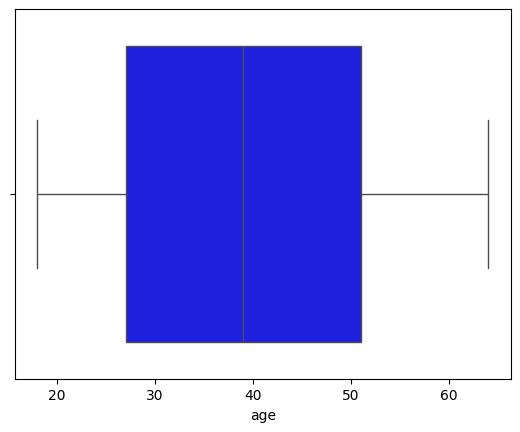

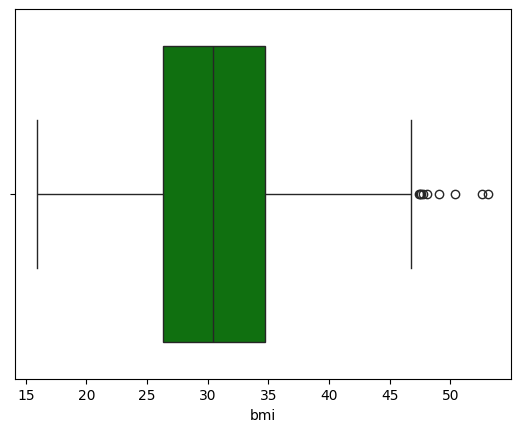

In [82]:
column = ['age', 'bmi']
colors = ['blue', 'green']  # Define colors for each variable

for i, col in enumerate(column):
    sns.boxplot(x=data_pre_pro[col], color=colors[i])  # Use color parameter with the specified color
    plt.xlabel(col)
    plt.show()


Age:

The boxplot for age shows a fairly symmetrical distribution without any outliers. Most ages seem to be concentrated around the median, with no extreme values.
BMI (Body Mass Index):

The boxplot for BMI shows a few outliers on both ends of the distribution. It indicates that while most individuals fall within a certain range of BMI values, there are some individuals with unusually high or low BMI values compared to the rest of the population.
Children:

The boxplot for the number of children also exhibits outliers on the upper end of the distribution. This suggests that while the majority of individuals may have fewer children, there are some with a relatively high number of children.
Charges:

The boxplot for charges displays several outliers on the higher end of the distribution. This indicates that there are individuals with significantly higher medical charges compared to the rest of the population, potentially due to serious medical conditions or treatments

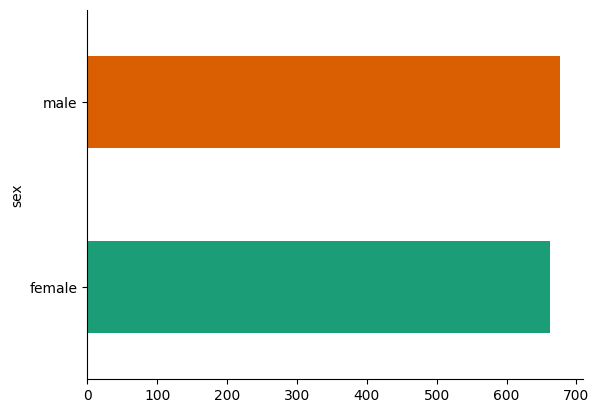

In [ ]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

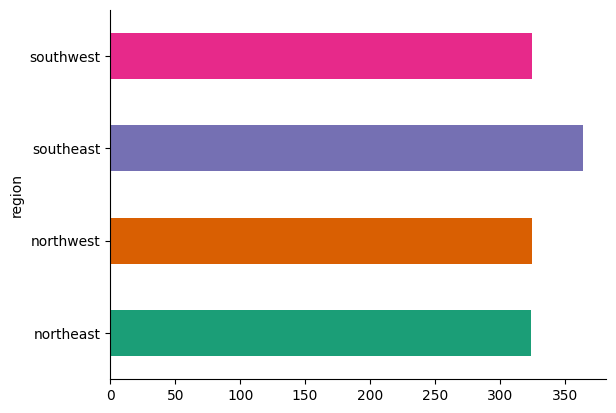

In [ ]:
# @title region

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

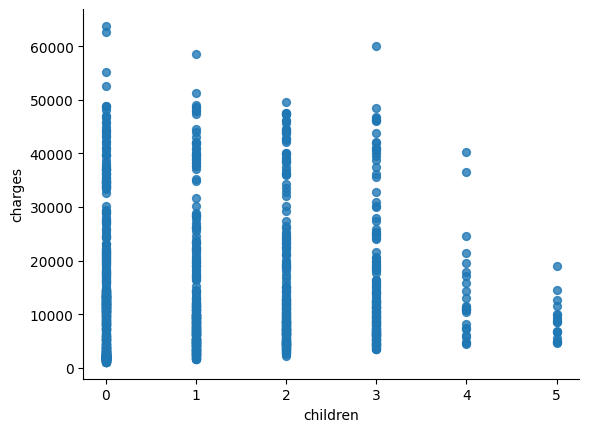

In [ ]:
# @title children vs charges

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

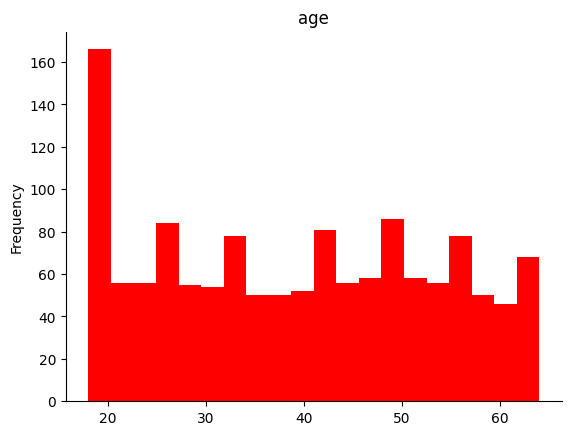

In [ ]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age',color='red')
plt.gca().spines[['top', 'right',]].set_visible(False)

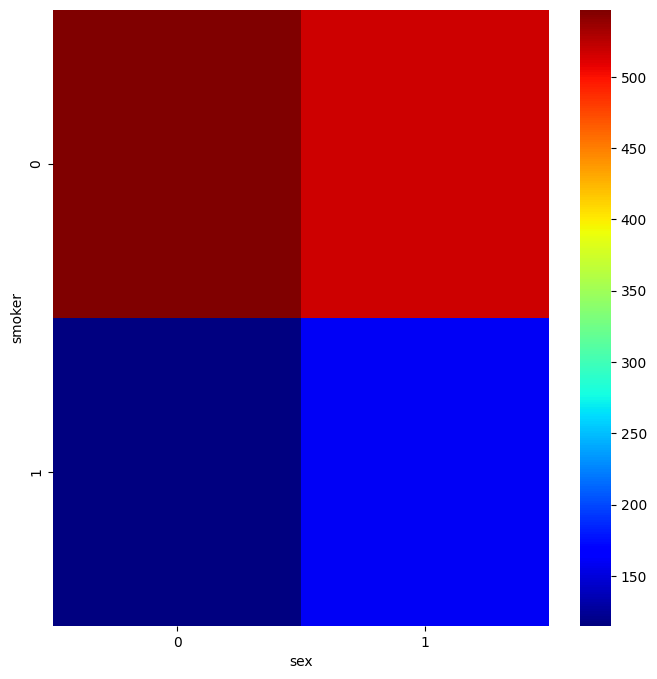

In [47]:
# @title sex vs smoker

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in data.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='jet')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

<ipython-input-37-879b854ffb01>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(data['charges']), kde = True, color = 'r' )


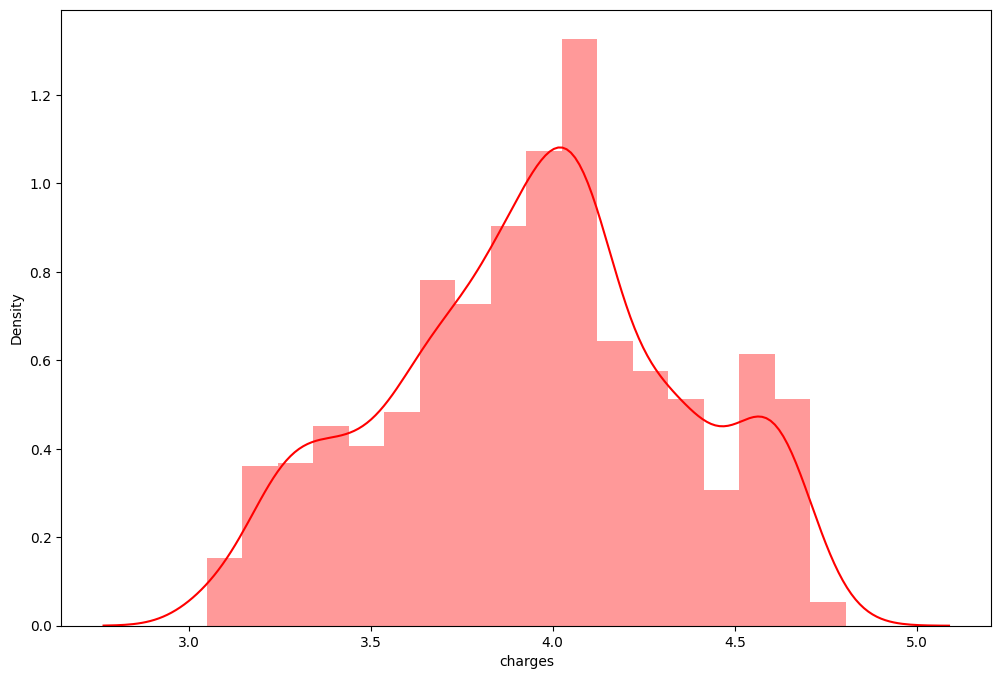

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(data['charges']), kde = True, color = 'r' )

In [ ]:
# Converting objects labels into categorical
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
# Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

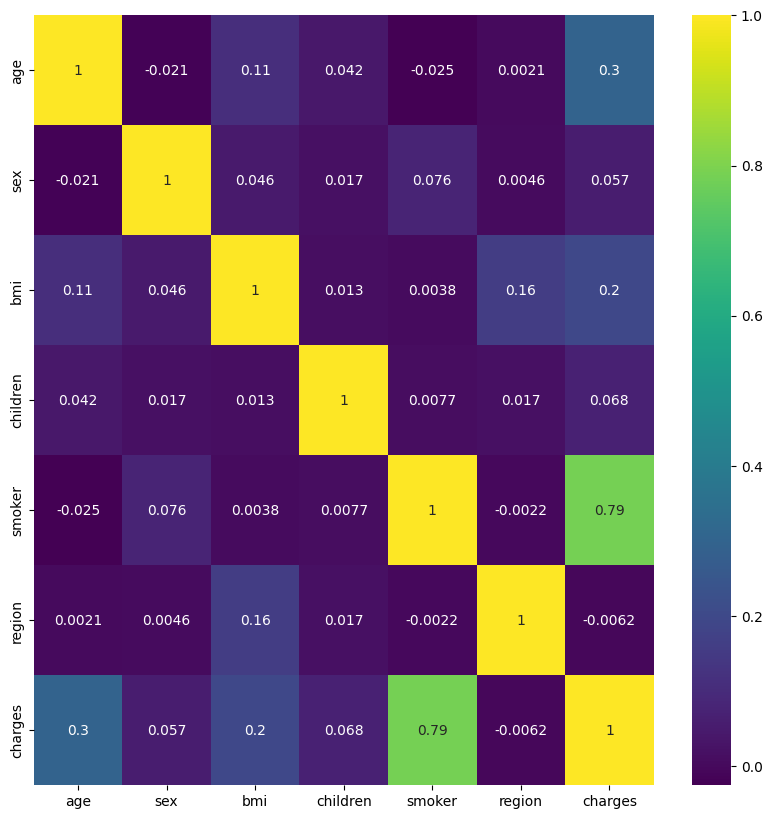

In [46]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='viridis')


No correlation, except with the smoking

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Handling Null Values
if data.isnull().sum().sum():
    data = data.dropna()

# Step 2: Handling String Values ('smoker' Column)
data['smoker'] = data['smoker'].replace(to_replace=['no', 'yes'], value=[0, 1])



# Step 3: Converting Categorical Variables to Dummy/Indicator Variables
data = pd.get_dummies(data)

# Step 4: Normalization (Scaling)
scaler = StandardScaler()
data['charges'] = scaler.fit_transform(data[['charges']])
data['bmi'] = scaler.fit_transform(data[['bmi']])
data['age'] = scaler.fit_transform(data[['age']])

# Resulting preprocessed DataFrame
data


,age,sex,bmi,children,smoker,charges
0,-1.438764,0,-0.453320,0,1,0.298584
1,-1.509965,1,0.509621,1,0,-0.953689
2,-0.797954,1,0.383307,3,0,-0.728675
3,-0.441948,1,-1.305531,0,0,0.719843
4,-0.513149,1,-0.292556,0,0,-0.776802
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,-0.220551
1334,-1.509965,0,0.206139,0,0,-0.914002
1335,-1.509965,0,1.014878,0,0,-0.961596
1336,-1.296362,0,-0.797813,0,0,-0.930362


In [69]:
X = data
y = data['charges']
X = X.drop("charges" , axis = 1)

In [70]:
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=1000)


In [71]:
#First model is Linear Regression
model = LinearRegression() # define instance
model.fit(X_train, y_train) # passing the data and fit it
score = model.score(X_test , y_test) # test the prediction
score

0.7548178846952174

In [72]:
# model_2 = SVR(kernel='poly') # define instance *kenel = 'poly' to try find non linear separate

model_2 = SVR(kernel='rbf') # define instance *kenel = 'rbf' to try find non linear separate
model_2.fit(X_train, y_train) # passing the data and fit it
score_2 = model_2.score(X_test , y_test) # test the prediction
score_2

0.8469338128290789

In [73]:

# model_3 = KNeighborsRegressor(n_neighbors= 5) # define instance
model_3 = KNeighborsRegressor(n_neighbors= 3) # define instance
model_3.fit(X_train, y_train) # passing the data and fit it
score_3 = model_3.score(X_test,y_test) # test the prediction
score_3



0.755437177892548

Visualization of the models and comparison between them:

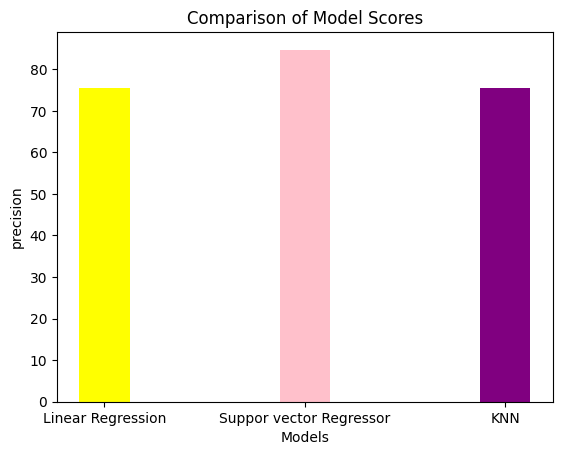

In [78]:
models = ['Linear Regression', 'Suppor vector Regressor',  'KNN']

scores = [score * 100, score_2 * 100, score_3 * 100]

plt.bar(models, scores, color=['yellow', 'pink', 'purple'], width = 0.25)

plt.xlabel("Models")
plt.ylabel("precision")
plt.title("Comparison of Model Scores")
plt.show()

Evaluate the models using appropriate regression metrics (e.g., mean absolute error, mean squared error) in addition to R-squared

In [75]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# SVR
model_2 = SVR(kernel='rbf')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
print(f"SVR MSE: {mse_2}")

# KNN
model_3 = KNeighborsRegressor(n_neighbors= 3)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test) # make predictions
mse_3 = mean_squared_error(y_test, y_pred_3)
print(f"KNN MSE: {mse_3}")

Linear Regression MSE: 0.2576619362782812
SVR MSE: 0.16085728812710032
KNN MSE: 0.25701112092761896


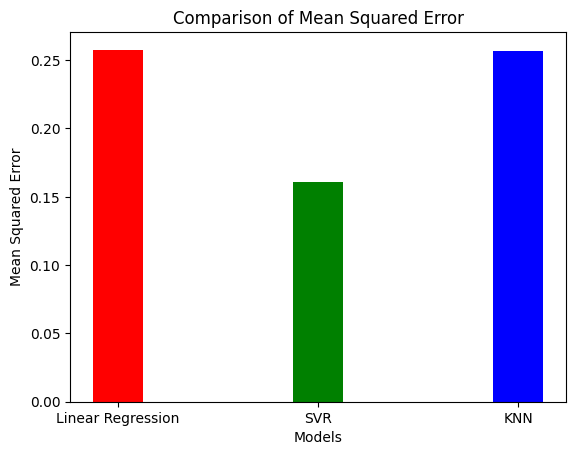

In [79]:
# plot a graph
mse_values = [mse, mse_2, mse_3]

models = ['Linear Regression', 'SVR', 'KNN']

plt.bar(models, mse_values, color=['red', 'green', 'blue'], width = 0.25)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()